# 参考
* [[Pythonによる科学・技術計算] ２次元イジングスピン系の熱力学量のメトロポリス法によるモンテカルロシミュレーション](https://qiita.com/sci_Haru/items/45ec84e6eb985f5c53d8)
    
    コード自体は参考にしづらいがモンテカルロ・シミュレーションの書き始めで見てた。
    気持ちだけを汲み取る。

* [Juliaで学ぶ古典モンテカルロシミュレーション](https://github.com/cometscome/MC)

    物性の永井さんの解説。
    コードそのものはJuliaで書かれているがIsingモデルのシミュレーションそのものの説明とアルゴリズムが参考になった。
    
    コードそのものは簡潔の書かれているが話の流れ上函数同士がとっ散らかっていて迷子になった。
    
* [スライド「統計力学〜Ising Modelを学ぶ〜」（安田宗樹：東北大）](http://www.adv-pip.yz.yamagata-u.ac.jp/~muneki/japanese/lecture/tohoku_univ/2012/Exp-D_StatPhys2012.pdf)
    
    Ising模型の説明で読んだ。
    とてもフランクな雰囲気のスライド。
    
* [IsingモデルのMonte Carloシミュレーション（柴田・松古）](http://school-crc.kek.jp/SummerSchool06/TEXT/text2.pdf)
    
    Markov連鎖と熱浴法・メトロポリス法の説明などが参考になった。
    
* [モンテカルロ法の前線（福島孝治：東京大）](https://www.smapip.is.tohoku.ac.jp/~smapip/2003/tutorial/textbook/koji-hukushima.pdf)
    
    熱浴法・メトロポリス法の違いについて少し参考にした。

# MarkdownとLaTeXとの併用の備忘録（GitHubで見る時の注意点）

1. 基本的には`$ $`あるいは`$$ $$`で数式を入力する。
    1行入力ならこれで充分。
    
1. `_ _`がMarkdownでの強調を意味するので`$$ $$`で挟まずに`\begiin{align} \end{align}`のみ使うと下添字のときに衝突する。
    衝突の恐れのない時は`$$ $$`を入力しないLaTeXと同じような感覚で使える（はず）。
    
1. ~~複数行にまたぐ数式を入力するときは`$$\begin{align} \end{align}$$`の環境内で改行をしない。
    ~~改行すると数式が崩れる、あるいはエラーを吐く。~~
    `$$\begin{aliged} \end{aligned}$$`で書けば環境内で改行しても問題ない。

# 2次元Ising模型とモンテカルロ・シミュレーション

理解が不十分なため内容に誤りが含まれているかもしれません。
鵜呑みにはしないで下さい。

## 2次元Ising模型

### ハミルトニアン

サイト$(i,j)$、$i,j \in \mathbb{Z}$、におけるスピンを$\sigma_{i j} = -1 \, \mathrm{or} \, 1$とおく。
サイト数$V$、最近接交換相互作用$J$、磁場$h$に対してハミルトニアンが
$$
\mathcal{H} \left( V, \sigma_V, J, h \right)
= -J \sum_{i, j} \sigma_{i j} \left(\sigma_{i+1 \ j} + \sigma_{i \ j+1} \right) 
-h \sum_{i,j} \sigma_{i j}
$$
で表わされるような模型を2次元Ising模型という。
自発磁化をもつ強磁性体を説明する簡単な模型になっている。
ただし$\sigma_V$はスピン配位そのものを表わす。
また式中には陽に表わされていないが周期境界条件を課すものとする。

### 分配函数

このハミルトニアンに対して分配函数は逆温度$\beta = 1/T$において
$$
Z [V, \beta, J, h] = \sum_{\sigma_V} \exp\left(-\beta \mathcal{H}\left(V, \sigma_V, J, h \right) \right)
$$
と表わされる。
この分配函数を操作することで系のあらゆる物理量が計算される。

### ボルツマン分布

$$
\exp\left(-\beta \mathcal{H}\left(V, \sigma_V, J, h \right) \right)
$$
をボルツマン因子（ボルツマンの重み、ボルツマンウェイト）という。
ボルツマン因子を分配函数で規格化した
$$
P_B \left(V, \sigma_V, J, h \right)
= \frac{\exp\left(-\beta \mathcal{H}\left(V, \sigma_V, J, h \right) \right)}{Z [V, \beta, J, h]}
$$
はボルツマン分布を与える。
$$
0 \leq P_B \left(V, \sigma_V, J, h \right) \leq 1
$$
かつ
$$
\sum_{\sigma_V} P_B \left(V, \sigma_V, J, h \right) = 1
$$
である。
ボルツマン分布における物理量$A\left(V, \sigma_V, J, h \right)$の平均は
$$
\left\langle A \right\rangle \left(V, J, h \right)
= \sum_{\sigma_V} A \left(V, \sigma_V, J, h \right) P_B \left( \sigma_V, V, J, h \right)
$$
と表わされる。

### 熱力学量

系のヘルツホルツのエネルギー密度は
$$
f \left(V, \beta, J, h\right)
= -\frac{1}{V \beta} \ln Z [V, \beta, J, h]
$$
で、系の磁化は
$$
m \left(V, \beta, J, h\right)
= - \frac{\partial f \left(V, \beta, J, h\right)}{\partial h}
= \frac{1}{V \beta} \frac{ \partial \ln Z [V, \beta, J, h]}{\partial h}
= \frac{1}{V} \left\langle \mathcal{M} \right\rangle \left(V, \beta, J, h \right)
$$
で与えられる。
ただし$\mathcal{M}\left(V, \sigma_V \right) = \sum_{i,j} \sigma_{ij}$であり、$V$についての操作はここではしないので見やすさのため基本的に$V$で規格化している。
磁化率は
$$
\chi \left(V, \beta, J, h\right)
= \frac{\partial m \left(V, \beta, J, h\right)}{\partial h}
= \frac{\beta}{V} \left( \left\langle \mathcal{M}^2 \right\rangle \left(V, \beta, J, h \right) - \left\langle \mathcal{M} \right\rangle \left(V, \beta, J, h\right)^2 \right)
$$
で得られる。

内部エネルギーは
$$
e \left( V, \beta, J, h \right)
= \frac{\partial \left( \beta f \left(V, \beta, J, h\right) \right)}{\partial \beta}
= - \frac{1}{V} \frac{\partial \ln Z [V, \beta, J, h]}{\partial \beta}
= \frac{1}{V} \left\langle \mathcal{H} \right\rangle \left(V, \beta, J, h \right)
$$
であり、比熱は
$$
c \left(V, \beta, J, h\right)
= \beta^2 \frac{\partial e \left(V, \beta, J, h\right)}{\partial \beta}
= \frac{\beta^2}{V} \left( \left\langle \mathcal{H}^2 \right\rangle \left(V, \beta, J, h \right) - \left\langle \mathcal{H} \right\rangle \left(V, \beta, J, h\right)^2 \right)
$$
で得られる。

### 計算上の問題

具体的にサイズが$V=4^2=16$の系を考える。
言い換えると一辺にサイトが$4$つある正方格子上にスピンが並んでいる状況を考える。
この時ありうるスピン配位の数は各スピンの自由度が2なので$2^V=65536$通りあることになる。
分配函数はその全てのスピン配位の和で表わされるので、スピンが$16$個しか並んでいない小さな系を考えるだけで約6.5万項の和の計算をしなければならない。
しかも各項に各スピン配位におけるハミルトニアンの計算もしなければならない。
このことから系のサイズを大きくすると簡単に項が膨大になって計算が難しくなることが推測される（現実的な系ではアボガドロ数$\sim 10^{23}$）。
分配函数が分かればあらゆる物理量が計算できる一方で分配函数そのものを求めるのはとても難しい。

平均場近似などを用いることでその性質を調べることは可能。

### 補：Binderキュムラント

相転移点を調べるための量としてBinderのキュムラントという量がある。
それは
$$
1 - \frac{\left\langle \mathcal{M}^4 \right\rangle \left(V, \beta, J, h \right)}{3 \left\langle \mathcal{M}^2 \right\rangle \left(V, \beta, J, h \right)^2}
$$
で表わされる。
$\beta\to\infty$で$2/3$に、$\beta\to0$で$0$に漸近する。
Binderキュムラントは相転移点直上で系の大きさの変化に対して不変になっている。
温度を横軸にして系の大きさが違うグラフをプロットして重ねれば、交点のある温度が相転移温度ということになる。

ここでの計算は全体に$3/2$を乗じて$T\to0$で$1$に漸近するように規格化している。

## モンテカルロ・シミュレーション

分配函数を扱うのは実際問題難しいが、概ね興味の対象は熱力学量であり分配函数そのものではない。
熱力学量は統計平均で求まるので、ありうるスピン配位から計算機上で適当にサンプリングして統計平均を取れば分配函数を真面目に解析しなくても（統計的誤差を含むが）熱力学量が求まるはずである。
このサンプリングは（擬似）乱数を用いて行なわれる。
乱数を用いた計算手法のことをモンテカルロ法、あるいはモンテカルロ・シミュレーションと呼ぶ。

ただし単純に乱数を与えることで統計平均を計算しても計算の収束が悪い。
収束を早めるために賢いサンプリングをする必要がある。
そのサンプリング方法がメトロポリス法、あるいは熱浴法と呼ばれる方法である。

### マルコフ連鎖

乱数によって初期のスピン配位を生成するが、それは熱力学量を計算する上で尤もらしい配位、つまり熱平衡な配位とは限らない。
したがってまずは配位を熱平衡な配位へ更新する必要がある。
また統計平均を計算するためにある程度のサンプルの大きさが必要であるため、熱平衡状態の配位から再び熱平衡状態の配位を得るような更新を行なう必要もある。

その配位の更新方法として用いられるのがマルコフ連鎖である。
マルコフ連鎖は適当な次の状態への遷移する確率は直前の状態にのみに依存する確率過程のことを指す。
初期スピン配位を$\sigma^{(0)}$とし、$n$回更新されたときのスピン配位を$\sigma^{(n)}$と表わすことにする。
以下$n$回更新されたことを時刻$n$と言うことにする。
マルコフ連鎖をシンボリックに書けば、スピン配位$\sigma^{(n-1)} = a$から$\sigma^{(n)} = b$へ遷移する確率が
$$
P \left(\sigma^{(n)} = b \mid \sigma^{(n-1)} =a \right)
$$
のように遷移の始点と終点との2状態のみを引数にした形で表わせる。

遷移確率は
$$
\sum_{b \in \sigma^{(n)}} P \left(\sigma^{(n) = b} \mid \sigma^{(n-1)} =a \right) = 1
$$
を満たす。
時刻$n-1$で適当なスピン配位$\sigma^{(n-1)} = a$から次の時刻$n$で遷移しうる全ての配位への遷移確率を全て足せば$1$になる。
また遷移確率は非負である。

### エルゴード性

周期的でなく有限なステップ数で任意の2状態の間で遷移が可能なことを言う。
後者は、任意の2状態間の遷移確率がゼロではない、あるいはゼロじゃない遷移確率の積で表わすことが出来る、とも言い換えられる。

この性質を満たすことで任意の状態から熱平衡状態に収束することが言える。

### 詳細釣り合い

時刻$n$のスピン配位が$\sigma^{(n)} = a$である確率を
$$
S \left( \sigma^{(n)} = a\right)
$$
と表わす。
$S \left( \sigma^{(n)} \right)$をスピン配位$\sigma^{(n)}$の確率分布という。
確率なので時刻$n$におけるあらゆるスピン配位に関して和を取ると
$$
\sum_{a \in \sigma^{(n)}} S \left( \sigma^{(n)} = a\right) = 1
$$
を満たし、各項が非負である。
Ising模型は系も時間も離散的なので、$S$は系のサイズの次元を持ったベクトルで$P$はそれらに作用する遷移行列として扱える。
式で書けば
$$
\begin{aligned}
S \left( \sigma^{(n)}\right) 
&= P \left(\sigma^{(n)} \mid \sigma^{(n-1)}\right) S \left( \sigma^{(n-1)}\right) \nonumber \\ 
&= P \left(\sigma^{(n)} \mid \sigma^{(n-1)}\right) P \left(\sigma^{(n-1)} \mid \sigma^{(n-2)}\right) \cdots P \left(\sigma^{(1)} \mid \sigma^{(0)}\right) S \left( \sigma^{(0)}\right) \nonumber
\end{aligned}
$$
である。
このとき配位の確率分布と遷移行列とが時刻によらないものとは特に仮定していない。

一方で熱平衡状態とは配位の確率分布とその遷移行列とがともに時刻に依存しない状態である。
平衡状態は充分な回数遷移行列を作用させることで達成される考え、その時の確率を$S \left( \sigma^{(\mathrm{eq})}\right)$とすると、熱平衡状態は
$$
S \left( \sigma^{(\mathrm{eq})}\right) 
= P \left(\sigma^{(\mathrm{eq})} \mid \sigma^{(\mathrm{eq})}\right) S \left( \sigma^{(\mathrm{eq})}\right)
$$
を満たすように遷移するはずである。
熱平衡状態は遷移行列の固有値$1$の固有状態を扱ってるとも見える。
$$
S \left( \sigma^{(\mathrm{eq})} = a_i\right)
= S^{(\mathrm{eq})}_i, \quad
  P \left(\sigma^{(\mathrm{eq})} = a_i \mid \sigma^{(\mathrm{eq})} = a_j\right)
= P^{(\mathrm{eq})}_{ij} \qquad
\left(i,j = 1, 2, \dots, V \right)
$$
なる成分の略記を導入しておいて式変形すると
$$
\begin{aligned}
S^{(\mathrm{eq})}_i = \sum_j P^{(\mathrm{eq})}_{ij} S^{(\mathrm{eq})}_j 
&= P^{(\mathrm{eq})}_{ii} S^{(\mathrm{eq})}_i + \sum_{j \neq i} P^{(\mathrm{eq})}_{ij} S^{(\mathrm{eq})}_j \nonumber \\ 
&= \left( P^{(\mathrm{eq})}_{ii} + \sum_{j \neq i} P^{(\mathrm{eq})}_{ji}\right) S^{(\mathrm{eq})}_i + \sum_{j \neq i} \left( P^{(\mathrm{eq})}_{ij} S^{(\mathrm{eq})}_j - P^{(\mathrm{eq})}_{ji} S^{(\mathrm{eq})}_i \right) \nonumber \\ 
&= \sum_{j} P^{(\mathrm{eq})}_{ji}S^{(\mathrm{eq})}_i + \sum_{j \neq i} \left( P^{(\mathrm{eq})}_{ij} S^{(\mathrm{eq})}_j - P^{(\mathrm{eq})}_{ji} S^{(\mathrm{eq})}_i \right) \nonumber \\ 
&= S^{(\mathrm{eq})}_i + \sum_{j \neq i} \left( P^{(\mathrm{eq})}_{ij} S^{(\mathrm{eq})}_j - P^{(\mathrm{eq})}_{ji} S^{(\mathrm{eq})}_i \right) \nonumber
\end{aligned}
$$
となる。
ゆえに
$$
P \left(\sigma^{(\mathrm{eq})} = a_i \mid \sigma^{(\mathrm{eq})} = a_j\right) S \left( \sigma^{(\mathrm{eq})} = a_j\right)
= P \left(\sigma^{(\mathrm{eq})} = a_j \mid \sigma^{(\mathrm{eq})} = a_i\right) S \left( \sigma^{(\mathrm{eq})} = a_i\right)
\qquad \left( i \neq j \right)
$$
となる。
このことを詳細釣り合い条件と呼ぶ。

詳細釣り合い条件を満たすようにスピン配位を遷移させると熱平衡状態のサンプルをうまく取得できる。

マルコフ連鎖において熱平衡であれば詳細釣り合い条件を満たすこと（十分条件）しか述べてないので必要性についてはここでは述べてない。

具体的にボルツマン分布を使って説明すると（記号的に紛らわしいが）$S$に対応するのが$P_B$なので詳細釣り合い条件は
$$
\begin{aligned}
\frac{P \left(\sigma^{(\mathrm{eq})} = a_j \mid \sigma^{(\mathrm{eq})} = a_i \right)}{P \left(\sigma^{(\mathrm{eq})} = a_i \mid \sigma^{(\mathrm{eq})} = a_j \right)} &= \frac{S \left( \sigma^{(\mathrm{eq})} = a_j \right)}{S \left( \sigma^{(\mathrm{eq})} = a_i \right)} \nonumber \\ 
&= \frac{P_B \left(V, \sigma_V = a_j, J, h \right)}{P_B \left(V, \sigma_V = a_i, J, h \right)} \nonumber \\ 
&= \exp \left[ -\beta \left( \mathcal{H}\left(V, \sigma_V = a_j, J, h \right) - \mathcal{H}\left(V, \sigma_V = a_i, J, h \right)\right) \right] \nonumber
\end{aligned}
$$
と書ける。
この条件さえ満たせば確率としての非負$1$以下の2条件を除けば任意性がある。
とくに工夫をしない方法としてはここで述べているようにボルツマン分布の確率を遷移確率として用いればよい。

一方で例えば
$$
\Delta_{ji} \left(V, J, h \right)
= \mathcal{H}\left(V, \sigma_V = a_j, J, h \right) - \mathcal{H}\left(V, \sigma_V = a_i, J, h \right)
= -\Delta_{ij} \left(V, J, h \right)
$$
と略記して
$$
P \left(\sigma^{(\mathrm{eq})} = a_j \mid \sigma^{(\mathrm{eq})} = a_i \right)
= \frac{e^{-\beta \Delta_{ji} \left(V, J, h \right)/2}}{e^{-\beta \Delta_{ji} \left(V, J, h \right)/2} + e^{\beta \Delta_{ji} \left(V, J, h \right)/2}}
$$
とおいても条件を満たす。
ボルツマン分布の確率をハミルトニアンの差分に注目して修正した遷移確率になっている。

また上記の遷移確率の決め方以外に
$$
P \left(\sigma^{(\mathrm{eq})} = a_j \mid \sigma^{(\mathrm{eq})} = a_i \right)
= \mathrm{min} \left\{ 1, \ \exp \left[ -\beta \Delta_{ji} \left(V, J, h \right) \right] \right\}
$$
と決めても条件を満たす。
配位が$a_i$から$a_j$へ更新されたときにハミルトニアンの値が小さくなっていれば指数函数の値が$1$より大きくなるので遷移確率は$1$となり（規格化）、ハミルトニアンの値が大きくなっていれば対応する値が遷移確率となる。
ハミルトニアンの値が小さくなる方向へは必ず更新されるが、ハミルトニアンの値が大きくなる方向へも一定の確率で更新される。
ただしハミルトニアンの値が大幅に大きくなるような更新は抑制される。

以下に遷移確率のグラフを示す。

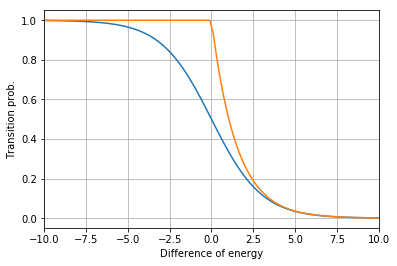

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def comparing_trans_prob (temp):
    '''
    comparing two tronsition probabilities 
    '''
    fig, ax = plt.subplots()
    x = np.linspace(-10, 10, 100)
    ax.plot(x, np.exp(-x/2/temp)/(np.exp(-x/2/temp) +np.exp(x/2/temp)))
    ax.plot(x, [min([1, np.exp(-i/temp)]) for i in x])
    ax.grid(True)
    ax.set_ylabel("Transition prob.")
    ax.set_xlabel("Difference of energy")
    plt.xlim(-10, 10)
    plt.show()
    
comparing_trans_prob(1.5)

### メトロポリス法・熱浴法

#### メトロポリス法

シミュレーションは概ね以下の手順で行われる。

1. 高温側からシミュレートする場合はランダムな初期配位$\sigma$を生成する。
    低温側からの場合は$1$のみまたは$-1$のみで埋めた初期配位$\sigma$を生成する。

1. 以下の手順を定常状態（熱平衡状態）になるまで繰り返す。

    1. 候補となる適当な配位$\tilde{\sigma}$を生成する。

    1. 現在の配位$\sigma$と候補の配位$\tilde{\sigma}$との遷移確率$P$を計算する。

    1. 遷移確率$P$に基づいて候補の配位受け入れるか捨てるかを決める。

        受け入れることが決まれば現在の配位$\sigma$を候補の配位$\tilde{\sigma}$に更新する。

1. 定常状態において以下の手順を目的のサンプルの大きさになるまで繰り返す。

    1. 現在の配位から相関が無視できる程度の回数、遷移確率$P$に基づいて配位を更新する。
    
    1. 得られた配位に基づいて目的の物理量を計算し、その結果を記録する。
    
1. 統計平均により熱力学量を計算する。

1. 以上の手順を各パラメータ値において実行する。

遷移確率は上で3番目に述べた
$$
P \left(\sigma^{(\mathrm{eq})} = a_j \mid \sigma^{(\mathrm{eq})} = a_i \right)
= \mathrm{min} \left\{ 1, \ \exp \left[ -\beta \Delta_{ji} \left(V, J, h \right) \right] \right\}
$$
を採用する。

模型の詳細によらなず、系全体のハミルトニアンさえ計算できればシミュレーションできるので汎用性がある。
自由度に依らず（適当な方法で候補となる配位を生成した後に）現在の配位と候補となる配位との比較によって遷移確率が定まる。

愚直に配位$\sigma$を更新するたびに配位全体でハミルトニアンを計算すると計算コストが簡単に高くなる。
ハミルトニアンの値の差分に依存するので関係するところのみを計算することなどでコストを抑えられる。

またメトロポリス法だからこの配位の更新法、というものは特に無いようである。

Ising模型を扱う際は1点ずつフリップさせて配位の更新を行ない、遷移確率も自由度が$2$であることと簡単に局所的な相互作用の部分だけで書けてしまうこととで熱浴法との違いが分かりづらように個人的には思う。


#### 熱浴法

メトロポリス法と比べると模型の詳細に依った方法である。
熱浴法はIsing模型のように局所的な相互作用で表わされ、それに基づいて分解できるときなどに使える。
注目するサイトを決め、その周りのサイトを熱浴と見なし、ハミルトニアンの中で局所的な相互作用に関わる項のみを考慮して遷移確率を与える。

注目するサイトの状態に関係なく、自由度（ここではスピンの$\pm1$）の数と（どのような相互作用をするかも含めて）熱浴となる周りの状態に依存する。
Ising模型の遷移確率は
$$
P_{\mathrm{HB}}\left( \sigma_{ij} = \pm 1\right)
= \frac{\exp\left[\mp \beta \sum_{k=\pm1} \left(\sigma_{i+k \ j} + \sigma_{i \ j+k} \right)\right]}{ \exp\left[ -\beta \sum_{k=\pm1} \left(\sigma_{i+k \ j} + \sigma_{i \ j+k} \right)\right] + \exp\left[ \beta \sum_{k=\pm1} \left(\sigma_{i+k \ j} + \sigma_{i \ j+k} \right)\right]}
$$
で表わされる。
$0$以上$1$未満の乱数を発生させ$P_{\mathrm{HB}}\left( \sigma_{ij} = -1\right)$未満であれば$\sigma_{ij}=-1$に、それ以外であれば$\sigma_{ij}=1$にする。
この操作を繰り返すことで系全体を更新する。

##### 補足

Ising模型は自由度が$2$で離散的なのでメトロポリス法との違いが不明瞭になってるように個人的に感じたので少し拡張した模型にも触れる。

$N$次元格子空間上の点$x$に自由度$\phi_x$があり、その値は離散的で小さい方から順に$\alpha_1, \alpha_2, \dots, \alpha_d$とする。
点$x$での局所的な相互作用を$I_x$と表わすことにすれば熱浴法で用いる遷移確率は
$$
P_{HB}\left(\phi_x = \alpha_i\right)
= \frac{\exp\left[ - \beta \alpha_i I_x\right]}{\sum_{k=1}^d \exp\left[ - \beta \alpha_k I_x\right]}
\qquad \left(i = 1, 2, \dots, d \right)
$$
で与えられる。
ただし追加で$P_{HB}\left(\phi_x = \alpha_0\right)=0$とする。
$I_x$は$x$での自由度そのものには依存しないが$x$とどのような相互作用をするのか、相互作用する自由度がどの状態になっているのかに依る。
$0$以上$1$未満の乱数$r$を発生させ、その値が
$$
\sum_{i=0}^{k-1} P_{HB}\left(\phi_x = \alpha_i\right)
\leq r <
\sum_{i=0}^k P_{HB}\left(\phi_x = \alpha_i\right)
$$
であれば$\phi_x = \alpha_k$にする。
この操作を繰り返し系全体を更新するのはIsing模型と同じである。

自由度の数が$d$なので分母の項数が$d$個であり、熱浴法は自由度の変化の影響を陽に受ける。
この点メトロポリス法は配位更新前後での比較を行なうので自由度の大きさが変わっても同じように扱うことが出来る。

#### まとめ

メトロポリス法：
現在のスピン配位に対して何かしらの方法で別のスピン配位を生成する。
生成したスピン配位を次の配位として受け入れるかどうかは両者のハミルトニアンの差に基づいて確率的に（メトロポリス法のところで述べた遷移確率を用いて）決める。
これを繰り返す。

熱浴法：
乱数などで適当にスピンを選ぶ。
選んだスピンと相互作用する周りのスピンの状態に基づいて、選んだスピンの次の状態を確率的に決める。
これをスピン配位全体に適用するのを繰り返す。

### 統計誤差

（能力を超えているので割愛）


In [34]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import seaborn as sns

# basic functions and subroutines
@jit
def initial_config(size_lat):
    "generate the initial spin configuration"
    return 2*(np.random.randint(0, 2, size=(size_lat, size_lat))-1/2)

# ボツ
# [[j * (-1)**np.random.randint(0,2) for j in i]  for i in np.ones((10,10))]
# (np.random.randint(0,2,size=(100,100))-1/2)*2

@jit
def hamiltonian(arr_spin, coupling, ex_field):
    "function to calculate the Hamiltonian of the Ising model (exchange interaction and external field)"
    n0, n1 = np.shape(arr_spin)
    energy = 0.0
    for i in range(-1,n0-1):
        for j in range(-1,n1-1):
            energy += -coupling*(arr_spin[i][j]*arr_spin[i][j+1] + arr_spin[i][j]*arr_spin[i+1][j])
    energy += -ex_field*np.sum(arr_spin)
    return energy

@jit
def update_config(arr_spin, n0, n1, energy, temp, coupling, ex_field):
    """
    subroutine to update the spin configuration with the Metropolis method and output the energy
    side-effect：updating the spin configuration
    """
    for i in range(0,n0): # np.random.permutation(np.arange(0,n0))でランダムにできるが遅くなる
        for j in range(0,n1):
            diff_energy = diff_hamiltonian(arr_spin, n0, n1, i, j, coupling, ex_field)
            # diff_energy<=0であれば指数函数の値は1以上なので必ず採択
            # diff_energy>0であれば乱数の値によって採択されるかされないかが決まる
            # 正のdiff_energyが小さいほど採択率が高い
#             # 短いけどちょっと時間がかかる
#             if np.random.rand() <= np.exp(-diff_energy/temp):
#                 spin_flip(arr_spin, i, j)
#                 energy += diff_energy
            # 上のifを分解したif-ifel
            if diff_energy <= 0:
                energy += diff_energy
                spin_flip(arr_spin, i, j)
            elif np.random.rand() < np.exp(-diff_energy/temp):
                energy += diff_energy
                spin_flip(arr_spin, i, j)
    return energy

@jit
def diff_hamiltonian(arr_spin, n0, n1, i, j, coupling, ex_field):
    "function to calculate the difference of the Hamiltonian generated by flipping the spin which we designated"
    return 2*(coupling*(arr_spin[i][j]*arr_spin[i-1][j] + arr_spin[i][j]*arr_spin[-n0+i+1][j] 
                        + arr_spin[i][j]*arr_spin[i][j-1] + arr_spin[i][j]*arr_spin[i][-n1+j+1])
              + ex_field*arr_spin[i][j])

@jit
def spin_flip(arr_spin, i, j):
    "subroutine to flip the spin we designated"
    arr_spin[i][j] = -arr_spin[i][j]    


In [66]:
# plot thermodynamical quantities
def magnetization_plot(size_lat, temp_min, temp_max, coupling, ex_field):
    """
    plot the magnetization per one site on a temperature-magnetization plane
    critical temperature T_c = 2J/log(sqrt(2)+1) ~ 2.27J
    """
    num_update = 20000 # 最大更新回数
    num_update_eq = 5000 # 最大更新回数のうち熱平衡へ移すための更新回数
    mag_lst =[] # 各温度における1サイトあたりの磁化のリスト
    mag_sample = [] # 各温度における1サイトあたりの磁化のサンプルのリスト
    temp_step = 100 # プロットする温度の分割数
    temp_lst = np.flip(np.linspace(temp_min, temp_max, temp_step)) # プロットする温度のリスト
    
    arr_spin = initial_config(size_lat) # 初期スピン配位生成
    n0, n1 = np.shape(arr_spin)
    energy = hamiltonian(arr_spin, coupling, ex_field) # 初期スピン配位におけるエネルギー

    for temp_tmp in temp_lst:
        mag_sample = []
        # 熱平衡までの更新
        for i in range(0, num_update_eq):
            energy=update_config(arr_spin, n0, n1, energy, temp_tmp, coupling, ex_field)
        # 熱平衡状態での平均磁化のサンプル取得
        for i in range(0, num_update - num_update_eq):
            energy=update_config(arr_spin, n0, n1, energy, temp_tmp, coupling, ex_field)
            energy=update_config(arr_spin, n0, n1, energy, temp_tmp, coupling, ex_field)
            mag_sample.append(np.sum(arr_spin)/len(arr_spin)**2)

        mag_lst.append(np.mean(mag_sample))
    
    # プロット
    plt.plot(temp_lst, mag_lst)
    plt.grid(True)
    plt.ylabel("magnetization per cite")
    plt.xlabel("T")
    plt.xlim(round(temp_min,1), temp_max)
    plt.show()
    
def specificheat_plot(size_lat, temp_min, temp_max, coupling, ex_field):
    """
    plot the specific heat per one sine on temperature-specific heat plane
    critical temperature T_c = 2J/log(sqrt(2)+1) ~ 2.27J
    """
    num_update = 40000 # 最大更新回数
    num_update_eq = 4000 # 最大更新回数のうち熱平衡へ移すための更新回数
    specific_heat_lst =[] 
    energy_sample = [] 
    energy_squared_sample = []
    temp_step = 50 # プロットする温度の分割数
    temp_lst = np.flip(np.linspace(temp_min, temp_max, temp_step)) # プロットする温度のリスト（降順）
    
    arr_spin = initial_config(size_lat) # 初期スピン配位生成
    n0, n1 = np.shape(arr_spin)
    energy = hamiltonian(arr_spin, coupling, ex_field) # 初期スピン配位におけるエネルギー

    for temp_tmp in temp_lst:
        energy_sample = []
        energy_squared_sample = []
        # 熱平衡までの更新
        for i in range(0, num_update_eq):
            energy = update_config(arr_spin, n0, n1, energy, temp_tmp, coupling, ex_field)
        # 熱平衡状態でのエネルギーのサンプル取得
        for i in range(0, num_update - num_update_eq):
            energy = update_config(arr_spin, n0, n1, energy, temp_tmp, coupling, ex_field)
            if i%2 == 0:
                energy_sample.append(energy/len(arr_spin)**2)
                energy_squared_sample.append(energy**2/len(arr_spin)**4)

        specific_heat_lst.append((np.mean(energy_squared_sample)-np.mean(energy_sample)**2)/temp_tmp**2)
    
    # プロット
    plt.plot(temp_lst, specific_heat_lst)
    plt.grid(True)
    plt.ylabel("specific heat")
    plt.xlabel("T")
    plt.xlim(round(temp_min,1), temp_max)
    plt.show()


In [88]:
# plot statistical quantities
def cumulantBinder_plot(size_lat_lst, coupling, ex_field):
    """
    plot the Binder cumulant
    T_c = 2J/log(sqrt(2)+1) ~ 2.27J
    """
    temp_c = 2*coupling/np.log(np.sqrt(2)+1)
    temp_min = 0.8
    temp_max = 1.2
    num_update = 40000 # 最大更新回数
    num_update_eq = 10000 # 最大更新回数のうち熱平衡へ移すための更新回数
    cumulant_lst =[] 
    mag_squared_sample = []
    mag_fourth_sample = []
    temp_step = 20 # プロットする温度の分割数
    temp_lst = np.flip(np.linspace(temp_min, temp_max, temp_step)) # プロットする温度のリスト
    
    fig, ax = plt.subplots()

    for size_lat in size_lat_lst:
        cumulant_lst = []
        arr_spin = initial_config(size_lat) # 初期スピン配位生成
        n0, n1 = np.shape(arr_spin)
        energy = hamiltonian(arr_spin, coupling, ex_field) # 初期スピン配位におけるエネルギー

        for temp_tmp in temp_lst:
            mag_squared_sample = []
            mag_fourth_sample = []
            # 熱平衡までの更新
            for i in range(0, num_update_eq):
                energy = update_config(arr_spin, n0, n1, energy, temp_c*temp_tmp, coupling, ex_field)
            # 熱平衡状態での平均磁化のサンプル取得
            for i in range(0, num_update - num_update_eq):
                energy = update_config(arr_spin, n0, n1, energy, temp_c*temp_tmp, coupling, ex_field)
                energy = update_config(arr_spin, n0, n1, energy, temp_c*temp_tmp, coupling, ex_field)
                mag_squared_sample.append(np.sum(arr_spin)**2/len(arr_spin)**4)
                mag_fourth_sample.append(np.sum(arr_spin)**4/len(arr_spin)**8)

            cumulant_lst.append((3-np.mean(mag_fourth_sample)/np.mean(mag_squared_sample)**2)/2.0)
    
        ax.plot(temp_lst, cumulant_lst, label=size_lat)
    
    ax.grid(True)
    ax.legend()
    ax.set_ylabel("Binder cumulant")
    ax.set_xlabel("T/T_c")
    plt.xlim(temp_min, temp_max)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()
    print("T_c = "+ str(temp_c))
    
@jit
def measuring_corrfunc(arr_spin, energy, temp, coupling, ex_field, step_thermalize, step_measuring, interval_measuring):
    '''
    culculate the correlation function of the Ising model
    '''
    n0, n1 = np.shape(arr_spin)
    ref_point0, ref_point1 = (n0-1)//2, (n1-1)//2 # reference point measuring the correlation function
    
    lst_corrfunc2d = np.zeros((n0, n1))

    # thermalize before measuring
    for i in range(0, step_thermalize):
        energy = update_config(arr_spin, n0, n1, energy, temp, coupling, ex_field)
    
    # first measuring
    for h in range(0, n0):
        for v in range(0, n1):
            lst_corrfunc2d[h][v] += arr_spin[ref_point0][ref_point1] * arr_spin[h][v]
    
    # update the spin alignment and measure the correlation function
    for step in range(1, step_measuring):
        for interval in range(0, interval_measuring):
            energy = update_config(arr_spin, n0, n1, energy, temp, coupling, ex_field)
        for h in range(0, n0):
            for v in range(0, n1):
                lst_corrfunc2d[h][v] += arr_spin[ref_point0][ref_point1] * arr_spin[h][v]
    
    # mean of the sample
    lst_corrfunc2d = lst_corrfunc2d/step_measuring
    
    return lst_corrfunc2d, ref_point0, ref_point1, energy


def corrfunc_radial_projection(lst_corrfunc2d, ref_point0, ref_point1):
    '''
    project the value of the correlation function onto the radial direction
    '''
    n0, n1 = np.shape(lst_corrfunc2d)
    lst_corrfunc_radial = []
    length_corrfunc, value_corrfunc = 0, 0
    
    for h in range(0, n0):
        for v in range(0, n1):
            lst_corrfunc_radial.append([ np.sqrt( (ref_point0-h)**2 + (ref_point1-v)**2), lst_corrfunc2d[h][v] ])
    
    lst_corrfunc_radial = np.array(sorted(lst_corrfunc_radial))
    
    lst_distance = np.array( sorted( list( set(lst_corrfunc_radial[0:, 0]))))
    lst_value = np.zeros(len(lst_distance))
    counter = 0
    
    for distance in lst_distance:
        lst_value[counter] = np.mean( np.array( list( filter(lambda x: x[0] == distance, lst_corrfunc_radial)))[0:,1])
        counter += 1
        
    return lst_distance, lst_value


def corrfunc_radial_plot(size_lat, temp_lst, coupling, ex_field, step_thermalize, step_measuring, interval_measuring):
    '''
    plot correlation function as a function of distance r
    '''
    t_c = 2.0/np.log(np.sqrt(2.0)+1)
    arr_spin = initial_config(size_lat)
    n0, n1 = np.shape(arr_spin)
    energy = hamiltonian(arr_spin, coupling, ex_field)
    lst_distance, lst_value = [], []
    
    fig, ax = plt.subplots()
    
    for temp in temp_lst:
        lst_corrfunc2d, ref_point0, ref_point1, energy = measuring_corrfunc(arr_spin, energy, temp, coupling, ex_field,
                                                          step_thermalize, step_measuring, interval_measuring)
    
        lst_distance, lst_value = corrfunc_radial_projection(lst_corrfunc2d, ref_point0, ref_point1)
        
        ax.plot(lst_distance, lst_value, label=temp)
        
    ax.grid(True)
    ax.legend()
    ax.set_ylabel("correlation function")
    ax.set_xlabel("r")
    plt.xlim(0,)
    plt.ylim(0, 1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()
    print("T_c = "+ str(t_c))
    
def log_corrfunc_radial_plot(size_lat, temp_lst, coupling, ex_field, step_thermalize, step_measuring, interval_measuring):
    '''
    plot log of the correlation function as a function of distance r
    '''
    t_c = 2.0/np.log(np.sqrt(2.0)+1)
    arr_spin = initial_config(size_lat)
    n0, n1 = np.shape(arr_spin)
    energy = hamiltonian(arr_spin, coupling, ex_field)
    lst_distance, lst_value = [], []
    
    fig, ax = plt.subplots()
    
    for temp in temp_lst:
        lst_corrfunc2d, ref_point0, ref_point1, energy = measuring_corrfunc(arr_spin, energy, temp, coupling, ex_field,
                                                          step_thermalize, step_measuring, interval_measuring)
    
        lst_distance, lst_value = corrfunc_radial_projection(lst_corrfunc2d, ref_point0, ref_point1)
        
        lst_value = -np.log(np.abs(lst_value))
        ax.plot(lst_distance, lst_value, label=temp)
        
    ax.grid(True)
    ax.legend()
    ax.set_xlabel("r")
    plt.xlim(0,)
    # plt.ylim(0, 1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()
    print("T_c = "+ str(t_c))

# Some tests

-6.0
0.001183431952662722


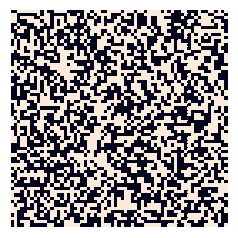

In [25]:
a=initial_config(65)
a0, a1 = np.shape(a)
e=hamiltonian(a, 1, 0.0)
print(e)
print(np.sum(a)/len(a)**2)

plt.figure()
sns.heatmap(a, cbar=False, square=True, xticklabels=False, yticklabels=False)

mag: 0.02390532544378698, energy: -0.27313609467455624
mag: -0.03337278106508876, energy: -0.6272189349112426
mag: 0.0035502958579881655, energy: -0.5912426035502959
mag: -0.03479289940828403, energy: -0.6035502958579881
mag: -0.026272189349112424, energy: -0.5874556213017752
mag: 0.033846153846153845, energy: -0.5902958579881656
mag: 0.018224852071005916, energy: -0.5798816568047337
mag: 0.04, energy: -0.5988165680473373
mag: 0.05609467455621302, energy: -0.5713609467455621
mag: 0.009704142011834319, energy: -0.6016568047337278
CPU times: user 764 ms, sys: 4 ms, total: 768 ms
Wall time: 759 ms


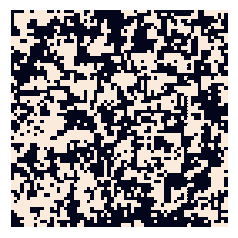

In [26]:
%%time
t_c = 2.0/np.log(np.sqrt(2.0)+1)
for i in range(0,1000):
    e=update_config(a, a0, a1, e, t_c+1.5, 1.0, 0.0)
    if i%100==0 :
        print("mag: " + str(np.sum(a)/len(a)**2) + ", energy: " + str(e/len(a)**2))
plt.figure()
sns.heatmap(a, cbar=False, vmax=1, vmin=-1, square=True, xticklabels=False, yticklabels=False)

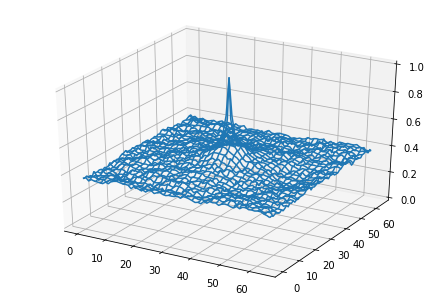

In [45]:
# 3D plot of the correlation function
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook

b, rp0, rp1, _ = measuring_corrfunc(a, e,  t_c, 1, 0, 5000, 5)

X, Y = np.meshgrid(np.arange(len(b[0])), np.arange(len(b)))

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_wireframe(X, Y, b)
ax.set_zlim(0, 1)
plt.show()

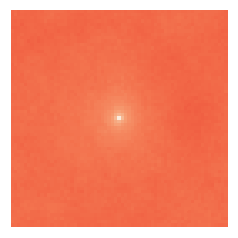

In [82]:
# heat map of the correlation function
plt.figure()
sns.heatmap(b, cbar=False, vmax=1, vmin=-1, square=True, xticklabels=False, yticklabels=False)

# Thermodynamical quantities

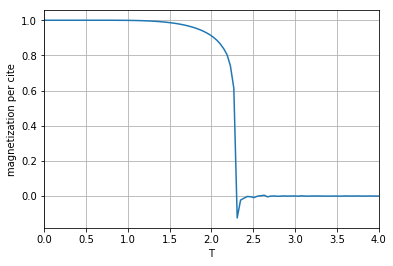

CPU times: user 13min 40s, sys: 1.68 s, total: 13min 41s
Wall time: 13min 38s


In [9]:
%%time
magnetization_plot(64, 0.01, 4.0, 1.0, 0.0)

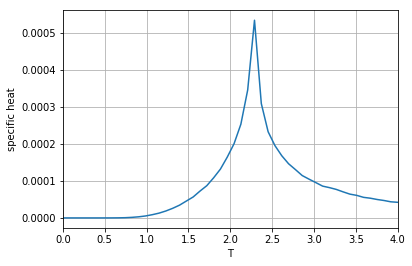

CPU times: user 7min 39s, sys: 320 ms, total: 7min 39s
Wall time: 7min 39s


In [8]:
%%time
specificheat_plot(64, 0.01, 4.0, 1, 0)

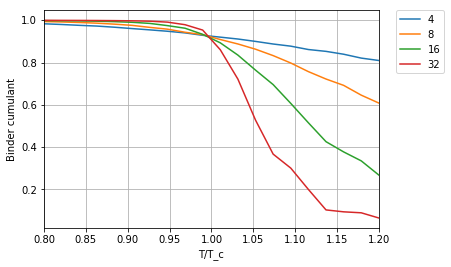

T_c = 2.269185314213022
CPU times: user 3min 10s, sys: 396 ms, total: 3min 10s
Wall time: 3min 10s


In [11]:
%%time
cumulantBinder_plot([4, 8, 16, 32], 1, 0)

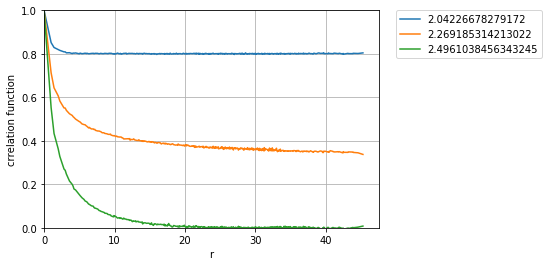

T_c = 2.269185314213022
CPU times: user 1min 30s, sys: 444 ms, total: 1min 30s
Wall time: 1min 29s


In [67]:
%%time
corrfunc_radial_plot(64, [t_c*0.9, t_c, t_c*1.1], 1, 0, 20000, 20000, 5)

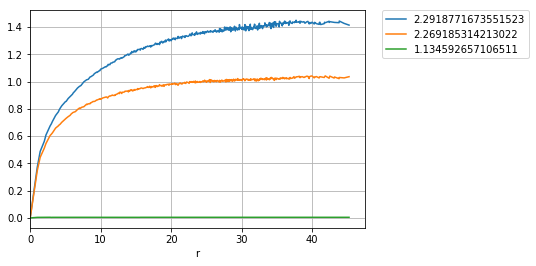

T_c = 2.269185314213022
CPU times: user 2min 4s, sys: 420 ms, total: 2min 4s
Wall time: 2min 4s


In [91]:
# the sloop of the graph is almost the inverse of the correlation length
%%time
log_corrfunc_radial_plot(64, [t_c*1.01, t_c, t_c*0.5], 1, 0, 20000, 30000, 5)